In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
is_v2 = True

#### **Traitement de la base de donnée**

In [ ]:
# Load the dataset
df = pd.read_csv('dataset/telco_dataset.csv')
df.head()

In [ ]:
def audit(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "missing": df.isna().sum(),
        "missing_%": (df.isna().mean() * 100).round(2),
        "unique": df.nunique(),
        "sample": df.iloc[0]
    })
audit(df)

In [ ]:
#on transforme les variables yes / no en binaire 
binary_cols = ["gender",'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
mapping = {'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0}
for col in binary_cols:
    df[col] = df[col].str.capitalize().map(mapping)    
df[binary_cols].head()

In [ ]:
# Encodage Ordinal pour le Contrat (Il y a une notion d'ordre/durée)
dummy_cols = []
if(is_v2) :
    contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
    df['Contract_Ordinal'] = df['Contract'].map(contract_mapping)
    dummy_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies", "PaymentMethod"]
    df = pd.get_dummies(df, columns= dummy_cols,dtype=int, drop_first=True)
else :
    dummy_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies", "Contract", "PaymentMethod"]
    df = pd.get_dummies(df, columns= dummy_cols,dtype=int)

df.head()

In [ ]:
df.describe()

In [ ]:
audit(df)

on remarque que totalcharge est de type objext, certain champs sont vide 

In [ ]:
# Conversion en numérique, les espaces deviennent des NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isna().sum()

In [ ]:
# Traitement de la colonne 'TotalCharges'
# Remplissage des NaN par 0 (car ce sont des nouveaux clients n'ayant rien payé)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
df.drop(columns=['customerID'], inplace=True)

In [ ]:
if(is_v2):
    df.to_csv("dataset/cleaned_dataset_v2.csv")
else :
    df.to_csv("dataset/cleaned_dataset.csv")

#### **Analyse descriptive et visualtion de la base de donnée**

In [87]:
base=pd.read_csv("dataset/cleaned_dataset.csv")
base.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,2,0,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,3,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,4,1,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


##### Analyse sur les variables quantitatives 

In [89]:
# On sélectionne les variables numériques
num_vars = ["tenure", "MonthlyCharges", "TotalCharges"]
print(base[num_vars].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


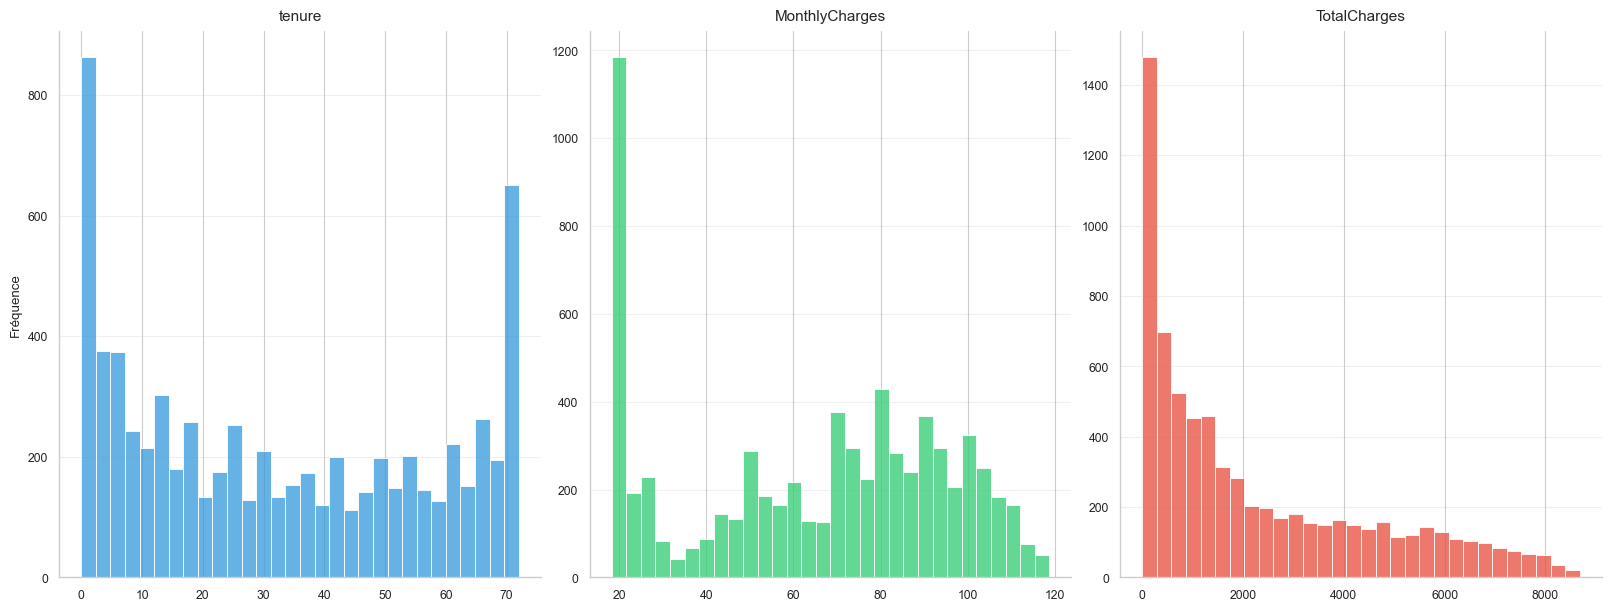

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid",context="paper")
plt.rcParams["font.family"] = "sans-serif"

palette = ["#3498db", "#2ecc71", "#e74c3c"]
num_vars = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, axes = plt.subplots(1, 3,figsize=(16, 6),constrained_layout=True)
for i, col in enumerate(num_vars):
    sns.histplot(data=base,x=col,bins=30,ax=axes[i],color=palette[i],edgecolor="white",linewidth=0.6)
    axes[i].set_title(col, fontsize=11, pad=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Fréquence" if i == 0 else "")
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].grid(axis="y", alpha=0.3)
plt.show()


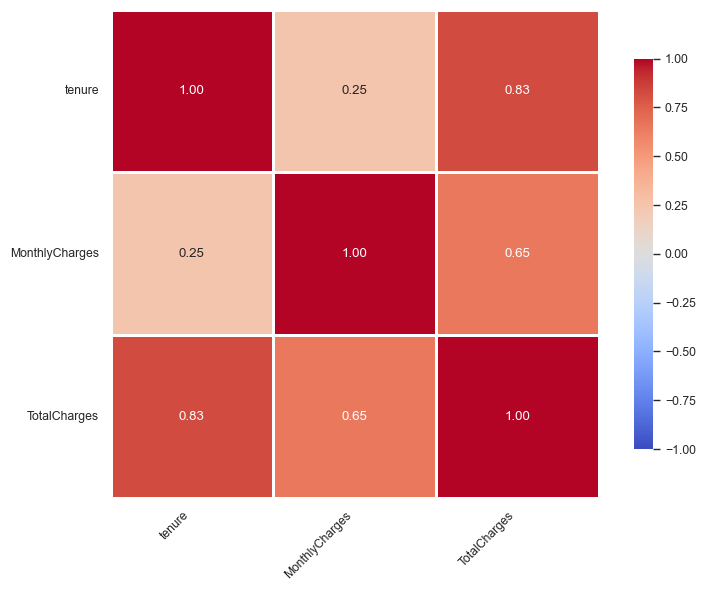

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calcul de la matrice de corrélation
corr_matrix = base[num_vars].corr()
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap="coolwarm",center=0,square=True,linewidths=1,linecolor='white',cbar_kws={'shrink': 0.8},ax=ax,vmin=-1,vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### Analyse sur les variables qualitatives

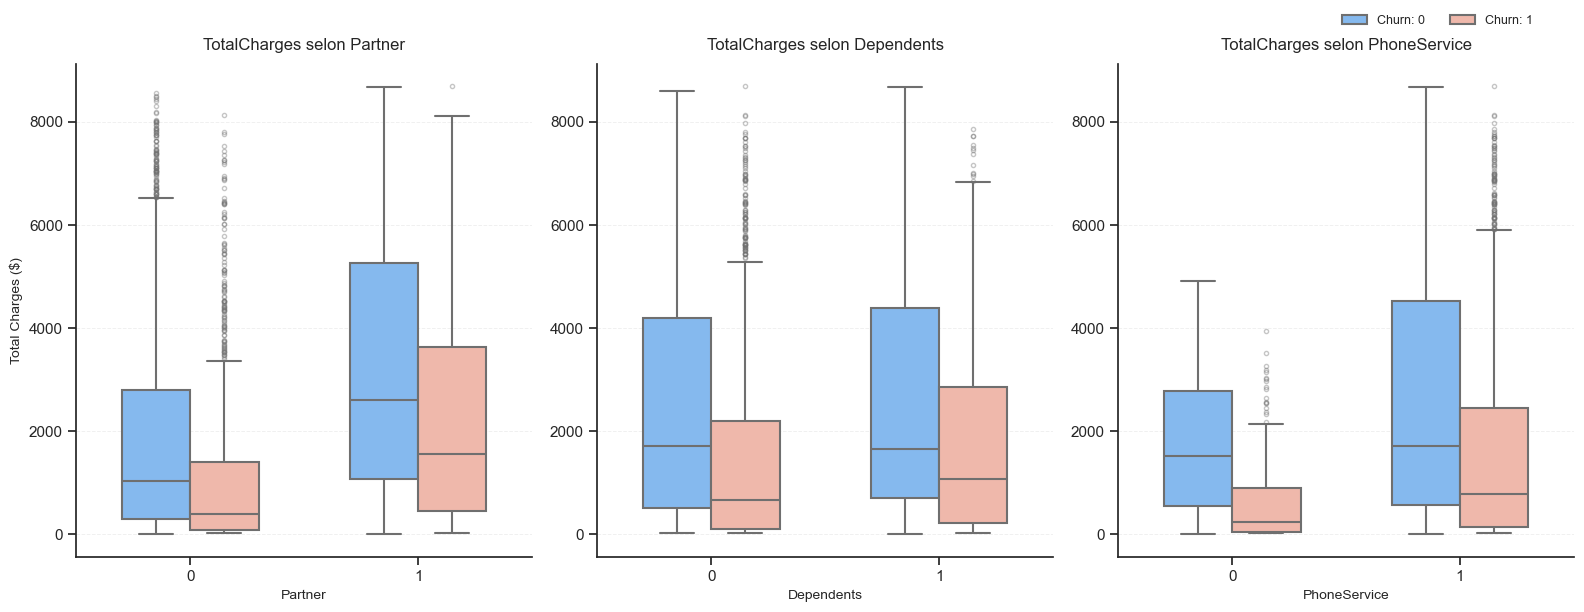

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables binaires à analyser
binary_vars = ["Partner", "Dependents", "PhoneService"]
sns.set_theme(style="ticks", context="notebook")
plt.rcParams['font.family'] = 'sans-serif'
palette = ["#74b9ff", "#fab1a0"]
# Création de la grille de boxplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6), facecolor='white')
for i, col in enumerate(binary_vars):
    sns.boxplot(x=col,y="TotalCharges",hue="Churn",data=df,palette=palette,ax=axes[i],width=0.6,linewidth=1.5,fliersize=3,flierprops={'alpha': 0.4})
    axes[i].set_title(f'TotalCharges selon {col}', fontsize=12, pad=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Total Charges ($)' if i == 0 else '', fontsize=10)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
    axes[i].set_axisbelow(True)
    if axes[i].get_legend():
        axes[i].get_legend().remove()
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Churn: 0', 'Churn: 1'], loc="lower right",frameon=False,ncol=2,fontsize=9,bbox_to_anchor=(0.97, 0.97))
plt.tight_layout()
plt.show()